In [7]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('final_commodity_prices.csv')

In [11]:
df.head()

,date,state_name,commodity,price,Year,Month,Day,WeekOfYear,Region
0,2015-01-06,Andaman and Nicobar,Atta (Wheat),45.0,2015,1,6,2,Other
1,2015-01-07,Andaman and Nicobar,Atta (Wheat),68.0,2015,1,7,2,Other
2,2015-01-09,Andaman and Nicobar,Atta (Wheat),52.0,2015,1,9,2,Other
3,2015-01-12,Andaman and Nicobar,Atta (Wheat),44.0,2015,1,12,3,Other
4,2015-01-13,Andaman and Nicobar,Atta (Wheat),52.0,2015,1,13,3,Other


In [13]:
df['commodity'].value_counts()

commodity
Atta (Wheat)              86428
Onion                     86428
Tomato                    86428
Tea Loose                 86428
Sugar                     86428
Rice                      86428
Potato                    86428
Salt Pack (Iodised)       86428
Mustard Oil (Packed)      86428
Moong Dal                 86428
Milk @                    86428
Masoor Dal                86428
Gram Dal                  84924
Gur                       84924
Urad Dal                  84924
Vanaspati (Packed)        84924
Tur/Arhar Dal             83982
Sunflower Oil (Packed)    81255
Soya Oil (Packed)         76112
Wheat                     74044
Groundnut Oil (Packed)    65325
Palm Oil (Packed)         65257
Name: count, dtype: int64

In [19]:
top_commodities = (
    df['commodity'].value_counts().head(7).index.tolist()
)


In [27]:
!pip install prophet

In [31]:
from prophet import Prophet
df = df[df['commodity'].isin(top_commodities)]

# Create an empty list to store results
forecast_results = []

# Loop over each state-commodity group
for (state, commodity), group in df.groupby(['state_name', 'commodity']):
    group = group.sort_values('date')  # Ensure sorted
    group = group[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'}).dropna()

    if len(group) < 100:  # Skip small time series
        continue

    try:
        model = Prophet()
        model.fit(group)

        future = model.make_future_dataframe(periods=30)  # 30 days ahead
        forecast = model.predict(future)

        forecast['state_name'] = state
        forecast['commodity'] = commodity

        forecast_results.append(forecast[['ds', 'yhat', 'state_name', 'commodity']])
    except Exception as e:
        print(f"Skipping {state}-{commodity} due to error: {e}")


11:46:56 - cmdstanpy - INFO - Chain [1] start processing
11:46:57 - cmdstanpy - INFO - Chain [1] done processing
11:46:58 - cmdstanpy - INFO - Chain [1] start processing
11:46:58 - cmdstanpy - INFO - Chain [1] done processing
11:46:59 - cmdstanpy - INFO - Chain [1] start processing
11:47:00 - cmdstanpy - INFO - Chain [1] done processing
11:47:01 - cmdstanpy - INFO - Chain [1] start processing
11:47:01 - cmdstanpy - INFO - Chain [1] done processing
11:47:02 - cmdstanpy - INFO - Chain [1] start processing
11:47:02 - cmdstanpy - INFO - Chain [1] done processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] done processing
11:47:05 - cmdstanpy - INFO - Chain [1] start processing
11:47:05 - cmdstanpy - INFO - Chain [1] done processing
11:47:06 - cmdstanpy - INFO - Chain [1] start processing
11:47:07 - cmdstanpy - INFO - Chain [1] done processing
11:47:08 - cmdstanpy - INFO - Chain [1] start processing
11:47:09 - cmdstanpy - INFO - Chain [1]

In [37]:
import pandas as pd

# Combine all DataFrames in the list into a single DataFrame
final_result = pd.concat(forecast_results, ignore_index=True)

# Now save it
final_result.to_csv("forecast_results.csv", index=False)


In [39]:

results_df = pd.read_csv('forecast_results.csv')  # or your actual file name
print(results_df.head())


           ds       yhat           state_name     commodity
0  2015-01-06  49.499495  Andaman and Nicobar  Atta (Wheat)
1  2015-01-07  49.507351  Andaman and Nicobar  Atta (Wheat)
2  2015-01-09  49.570686  Andaman and Nicobar  Atta (Wheat)
3  2015-01-12  49.523909  Andaman and Nicobar  Atta (Wheat)
4  2015-01-13  49.657696  Andaman and Nicobar  Atta (Wheat)


In [43]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612136 entries, 0 to 612135
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ds          612136 non-null  object 
 1   yhat        612136 non-null  float64
 2   state_name  612136 non-null  object 
 3   commodity   612136 non-null  object 
dtypes: float64(1), object(3)
memory usage: 18.7+ MB


<Axes: title={'center': 'Rice Price Forecast in MP'}, xlabel='ds'>

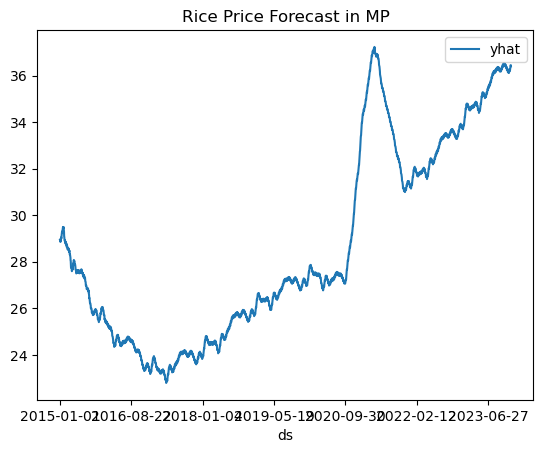

In [74]:

results_df.query("commodity == 'Rice' and state_name == 'Madhya Pradesh'").plot(x='ds', y='yhat', title='Rice Price Forecast in MP')


In [72]:
results_df.query("commodity == 'Rice' and state_name == 'Madhya Pradesh'").head()




,ds,yhat,state_name,commodity
311768,2015-01-01,28.955772,Madhya Pradesh,Rice
311769,2015-01-02,28.964424,Madhya Pradesh,Rice
311770,2015-01-03,28.933439,Madhya Pradesh,Rice
311771,2015-01-04,28.854515,Madhya Pradesh,Rice
311772,2015-01-05,28.890831,Madhya Pradesh,Rice


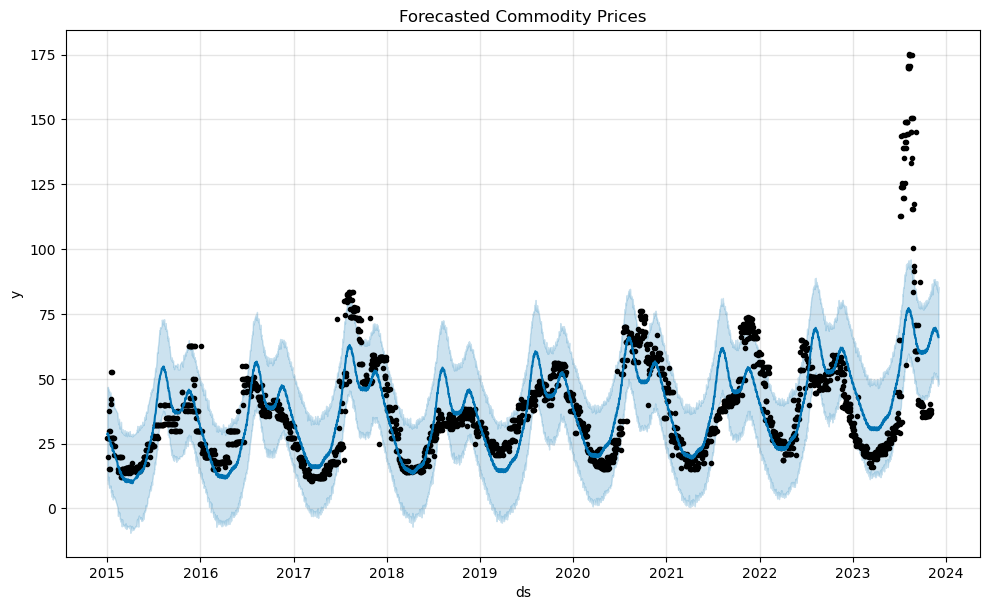

In [65]:
import matplotlib.pyplot as plt
model.plot(forecast)
plt.title("Forecasted Commodity Prices")
plt.show()


In [88]:
df_mp_Rice= df[(df['commodity'] == 'Rice') & (df['state_name'] == 'Madhya Pradesh')][['date', 'price']]
df_mp_Rice= df_mp_Rice.rename(columns={'date': 'ds', 'price': 'y'})
df_mp_Rice= df_mp_Rice.sort_values('ds')


In [90]:

model = Prophet()
model.fit(df_mp_Rice)


12:26:32 - cmdstanpy - INFO - Chain [1] start processing
12:26:34 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


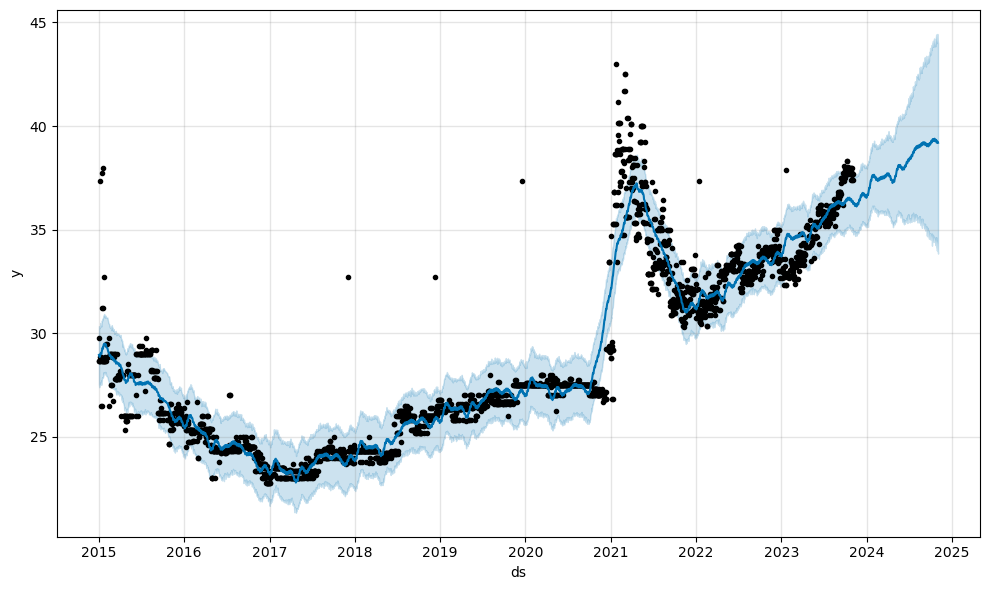

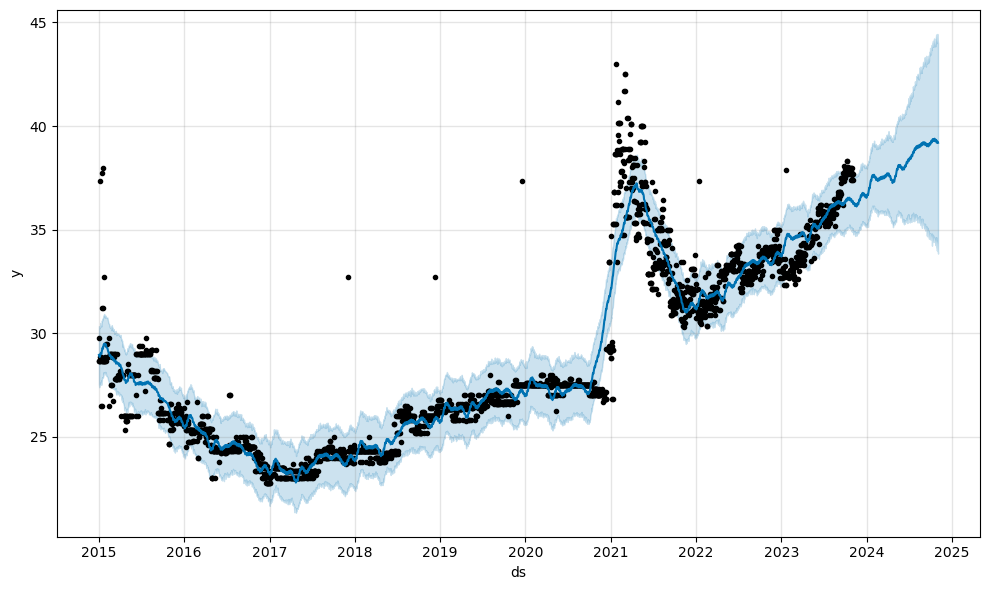

In [96]:
model.plot(forecast)
